In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv


In [2]:
import pandas as pd

# Load the dataset
url = "/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
data.isnull().sum()

# Encode categorical variables if any (assuming target is 'stress_level')
# data = pd.get_dummies(data, drop_first=True)

# Split the data into features and target
X = data.drop('stress_level', axis=1)
y = data['stress_level']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the models
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate the models
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)




Model: SVM
Accuracy: 0.8545454545454545
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        76
           1       0.91      0.85      0.88        73
           2       0.88      0.83      0.86        71

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.86       220
weighted avg       0.86      0.85      0.86       220

--------------------------------------------------
Model: Random Forest
Accuracy: 0.8681818181818182
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        76
           1       0.90      0.88      0.89        73
           2       0.84      0.87      0.86        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.8909090909090

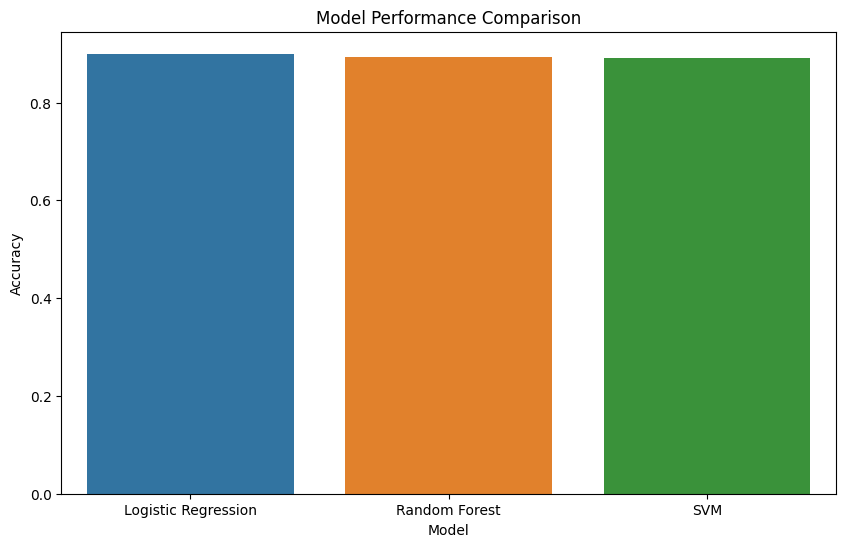

                 Model  Accuracy
0  Logistic Regression  0.900000
1        Random Forest  0.893939
2                  SVM  0.890909


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv"
data = pd.read_csv(url)

# Preprocess the data
X = data.drop('stress_level', axis=1)
y = data['stress_level']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
svm = SVC()

# Train the models
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train_scaled, y_train)

# Make predictions
logreg_pred = logreg.predict(X_test_scaled)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test_scaled)

# Evaluate the models
logreg_acc = accuracy_score(y_test, logreg_pred)
rf_acc = accuracy_score(y_test, rf_pred)
svm_acc = accuracy_score(y_test, svm_pred)

# Create a dataframe for visualization
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [logreg_acc, rf_acc, svm_acc]
})

# Plotting the performance metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# Print accuracy scores
print(model_performance)


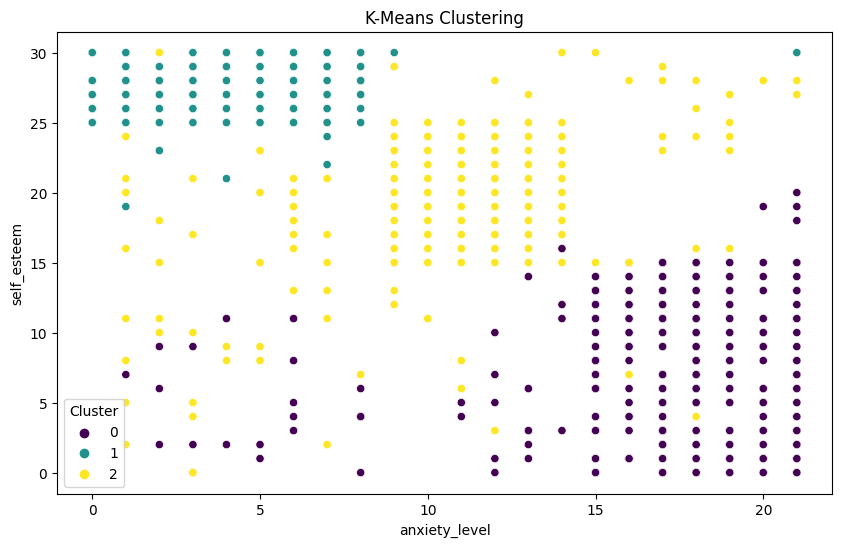

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  academic_performance  study_load  \
0                  3  ...                     3           2

In [5]:
 import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv"  # Replace with your dataset URL or path
data = pd.read_csv(url)

# Preprocess the data
# Assuming the dataset does not need much preprocessing and has only numeric features
X = data.select_dtypes(include=[float, int])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly set n_init
kmeans.fit(X)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.columns[0], y=X.columns[1], hue='Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

# Print the first few rows with cluster labels
print(data.head())


['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


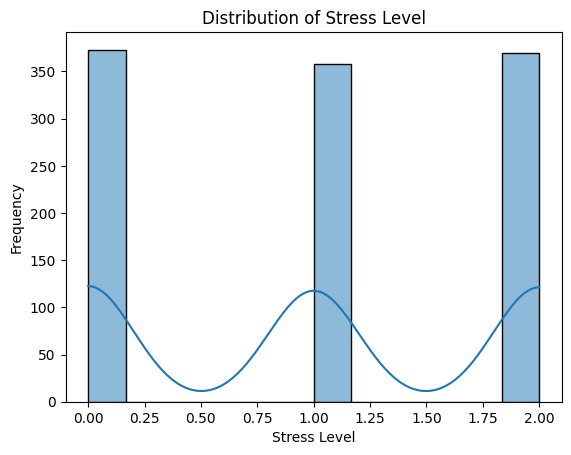

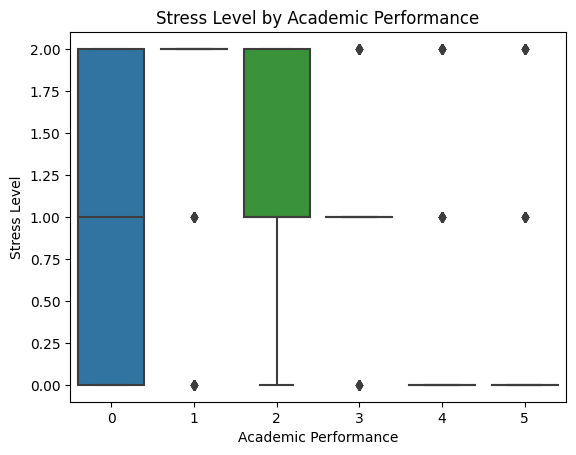

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = '/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv'  # Replace with the actual URL
data = pd.read_csv(url)

# Check the column names
print(data.columns.tolist())

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Define actual column names
stress_factor_column = 'stress_level'  # Correct column name
category_column = 'academic_performance'  # Example category; adjust as needed

# EDA
sns.histplot(data[stress_factor_column], kde=True)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=category_column, y=stress_factor_column, data=data)
plt.title('Stress Level by Academic Performance')
plt.xlabel('Academic Performance')
plt.ylabel('Stress Level')
plt.show()




Columns in the dataset: Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


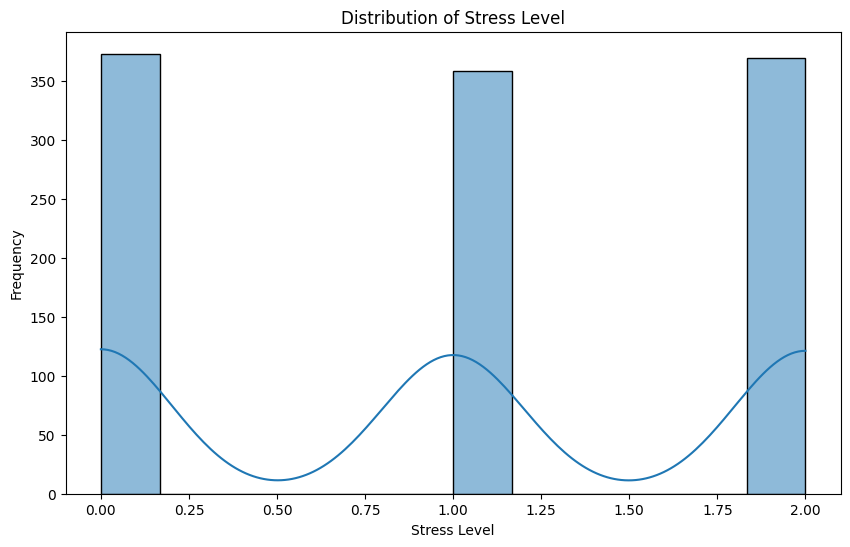

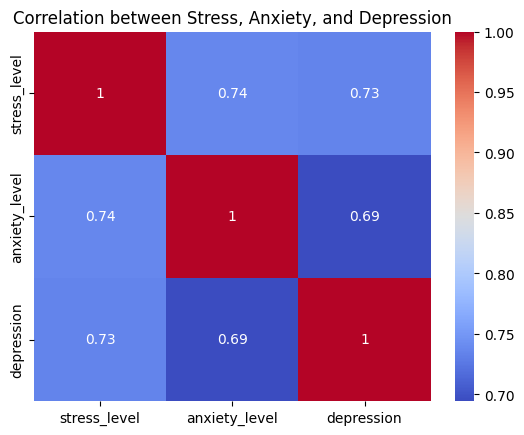

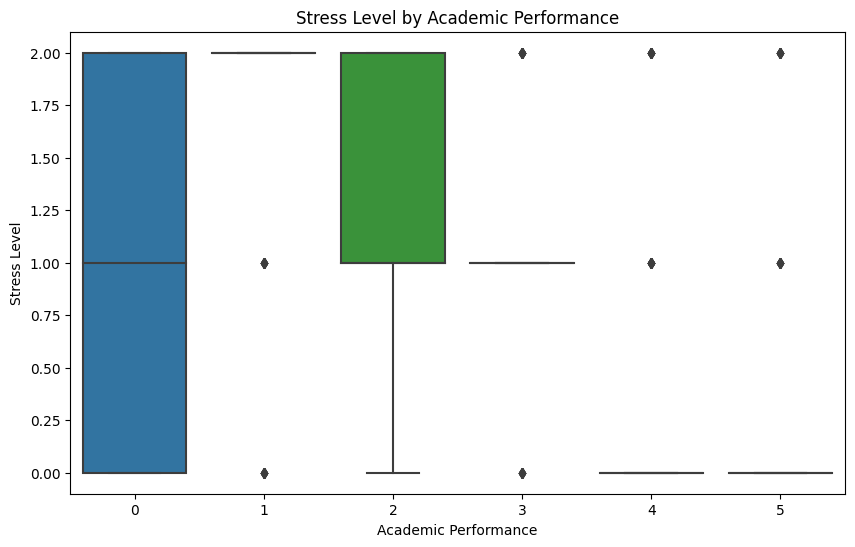

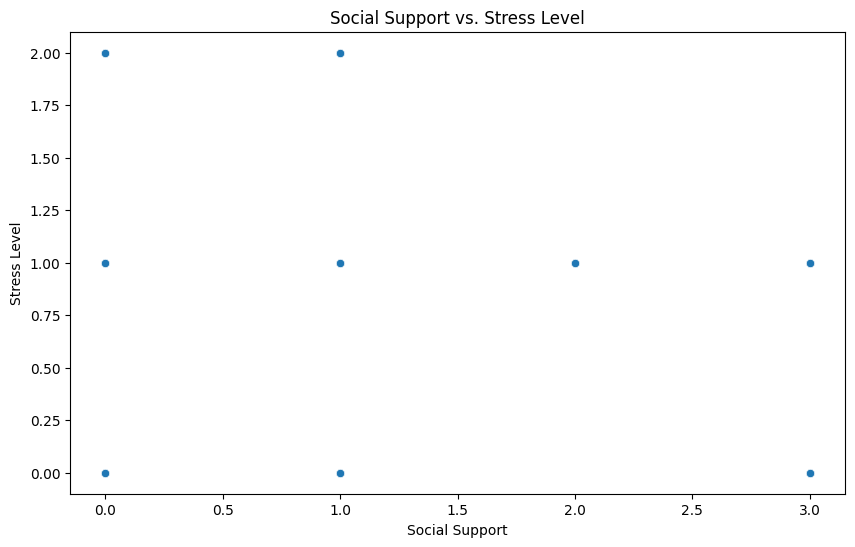

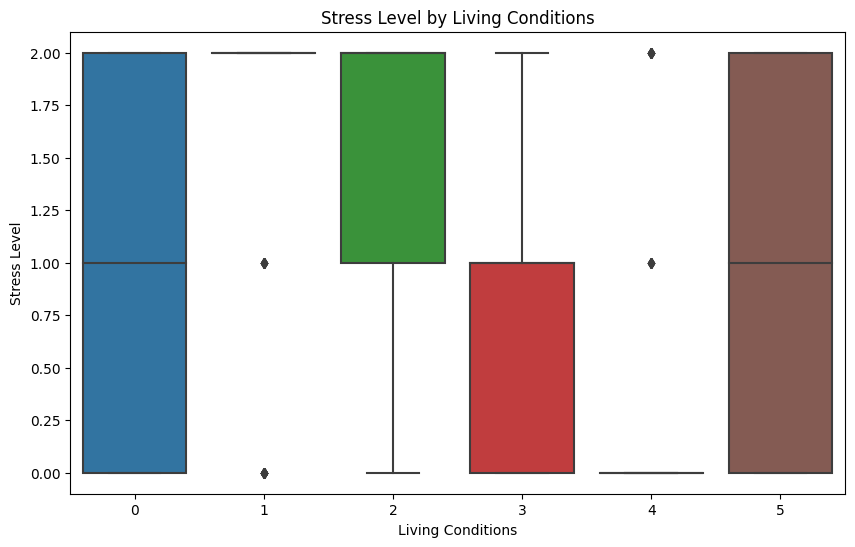

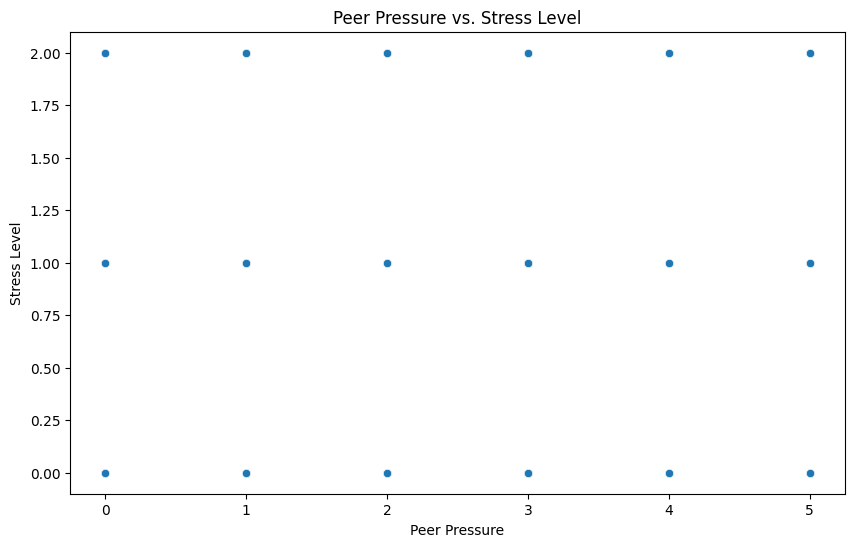

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv')

# Check column names
print("Columns in the dataset:", df.columns)

# Distribution of stress levels
plt.figure(figsize=(10, 6))
sns.histplot(df['stress_level'], kde=True)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

# Correlation analysis
correlation = df[['stress_level', 'anxiety_level', 'depression']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Stress, Anxiety, and Depression')
plt.show()

# Stress Level vs. Academic Performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='academic_performance', y='stress_level', data=df)
plt.title('Stress Level by Academic Performance')
plt.xlabel('Academic Performance')
plt.ylabel('Stress Level')
plt.show()

# Social Support vs. Stress Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='social_support', y='stress_level', data=df)
plt.title('Social Support vs. Stress Level')
plt.xlabel('Social Support')
plt.ylabel('Stress Level')
plt.show()

# Living Conditions Impact
plt.figure(figsize=(10, 6))
sns.boxplot(x='living_conditions', y='stress_level', data=df)
plt.title('Stress Level by Living Conditions')
plt.xlabel('Living Conditions')
plt.ylabel('Stress Level')
plt.show()

# Peer Pressure Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='peer_pressure', y='stress_level', data=df)
plt.title('Peer Pressure vs. Stress Level')
plt.xlabel('Peer Pressure')
plt.ylabel('Stress Level')
plt.show()


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/student-stress-factors-a-comprehensive-analysis/StressLevelDataset.csv')

# Remove duplicate rows
df = df.drop_duplicates()
print("Duplicates removed:", df.shape[0])

# Handle missing values
df.fillna(df.mean(), inplace=True)  # or use df.dropna()
print("Missing values handled:", df.shape[0])

# Remove irrelevant columns
irrelevant_columns = ['unnecessary_column1', 'unnecessary_column2']  # Update with actual names
df.drop(columns=irrelevant_columns, inplace=True, errors='ignore')
print("Irrelevant columns removed:", df.columns)


Duplicates removed: 1100
Missing values handled: 1100
Irrelevant columns removed: Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')
